In [19]:
#import dependencies
import scipy as sp
import pandas as pd
import numpy as np
import copulas as cp
from sklearn.datasets import make_classification, make_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#we want to generate synthetic data
#specify:
#-num_rows: number of rows
#-num_informative_features: number of informative features
#-num_redundant_features: number of redundant features (random linear combinations of informative features)
#-num_nuisance_features: uncorrelated features drawn from [-1, 1]

#return:
# a num_rows x (num_informative_features+num_redundant_features+num_nuisance_features + 1 [for target variable]) dataframe
def generate_synthetic_data(num_rows, num_informative_features, num_redundant_features, num_nuisance_features):
    return_df = pd.DataFrame()
    
    return 

In [21]:
#testing make_classification
X_class, y_class = make_classification(n_samples= 500, n_features= 4, n_informative=3, n_redundant= 1,n_classes= 3, shuffle=False)

In [22]:
X = pd.DataFrame(X_class, columns=["Informative Feature 1", "Informative Feature 2","Informative Feature 3","Redundant Feature 1"])
X.head()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1
0,-0.368107,-1.311228,-0.465412,-0.462678
1,0.179862,0.959893,-1.636397,2.024879
2,-1.439011,-0.104655,-2.053467,1.824960
3,-0.665474,1.499333,-2.222333,2.982010
4,-1.569689,-1.078996,-1.474242,0.681326


In [23]:
#create nuisance features
def generate_nuisance_features(num_features, num_rows):
    nuisance_features = []
    return_df = pd.DataFrame()
#     columns = [f"Nuisance Feature {i+1}" for i in range(num_features)]
    for j in range(num_features):
        return_df[f"Nuisance Feature {j+1}"] =np.random.uniform(low=-1, high=1, size=(num_rows, ))
   
    return return_df

X_NF = generate_nuisance_features(2, 500)
X_NF

,Nuisance Feature 1,Nuisance Feature 2
0,0.797412,-0.679362
1,-0.775982,0.363486
2,0.166329,0.224459
3,0.018303,-0.510626
4,-0.947707,-0.567546
...,...,...
495,-0.674194,-0.410691
496,-0.357218,-0.079097
497,0.151042,-0.258015
498,0.836987,-0.421188


In [24]:
Y = pd.DataFrame(y_class, columns=["Class Y"])
Y.head()

,Class Y
0,0
1,0
2,0
3,0
4,0


In [25]:
classification_set = pd.concat([X, X_NF, Y], axis=1)
classification_set.head()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Nuisance Feature 1,Nuisance Feature 2,Class Y
0,-0.368107,-1.311228,-0.465412,-0.462678,0.797412,-0.679362,0
1,0.179862,0.959893,-1.636397,2.024879,-0.775982,0.363486,0
2,-1.439011,-0.104655,-2.053467,1.824960,0.166329,0.224459,0
3,-0.665474,1.499333,-2.222333,2.982010,0.018303,-0.510626,0
4,-1.569689,-1.078996,-1.474242,0.681326,-0.947707,-0.567546,0


In [26]:
classification_set.describe()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Nuisance Feature 1,Nuisance Feature 2,Class Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.107477,-0.381357,0.026631,-0.271882,0.007113,0.018228,0.996000
std,1.465684,1.256380,1.444672,1.573659,0.569514,0.574272,0.815668
min,-4.407847,-4.275253,-4.375365,-4.509913,-0.999502,-0.993197,0.000000
25%,-1.162086,-1.310527,-1.108575,-1.450513,-0.466116,-0.467221,0.000000
50%,-0.246354,-0.551160,-0.104372,-0.312550,-0.018182,0.000476,1.000000
75%,0.911171,0.598777,1.129237,0.827191,0.504623,0.511315,2.000000
max,4.507611,2.773185,4.170502,3.892897,0.997740,0.996958,2.000000


In [27]:
classification_set.corr()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Nuisance Feature 1,Nuisance Feature 2,Class Y
Informative Feature 1,1.000000,0.160926,-0.047077,0.024026,0.125142,0.004675,0.502305
Informative Feature 2,0.160926,1.000000,-0.130070,0.631277,0.064964,0.026091,0.017339
Informative Feature 3,-0.047077,-0.130070,1.000000,-0.844766,-0.002904,0.065875,0.027249
Redundant Feature 1,0.024026,0.631277,-0.844766,1.000000,0.025165,-0.037500,-0.062233
Nuisance Feature 1,0.125142,0.064964,-0.002904,0.025165,1.000000,-0.017828,0.060345
Nuisance Feature 2,0.004675,0.026091,0.065875,-0.037500,-0.017828,1.000000,0.030030
Class Y,0.502305,0.017339,0.027249,-0.062233,0.060345,0.030030,1.000000


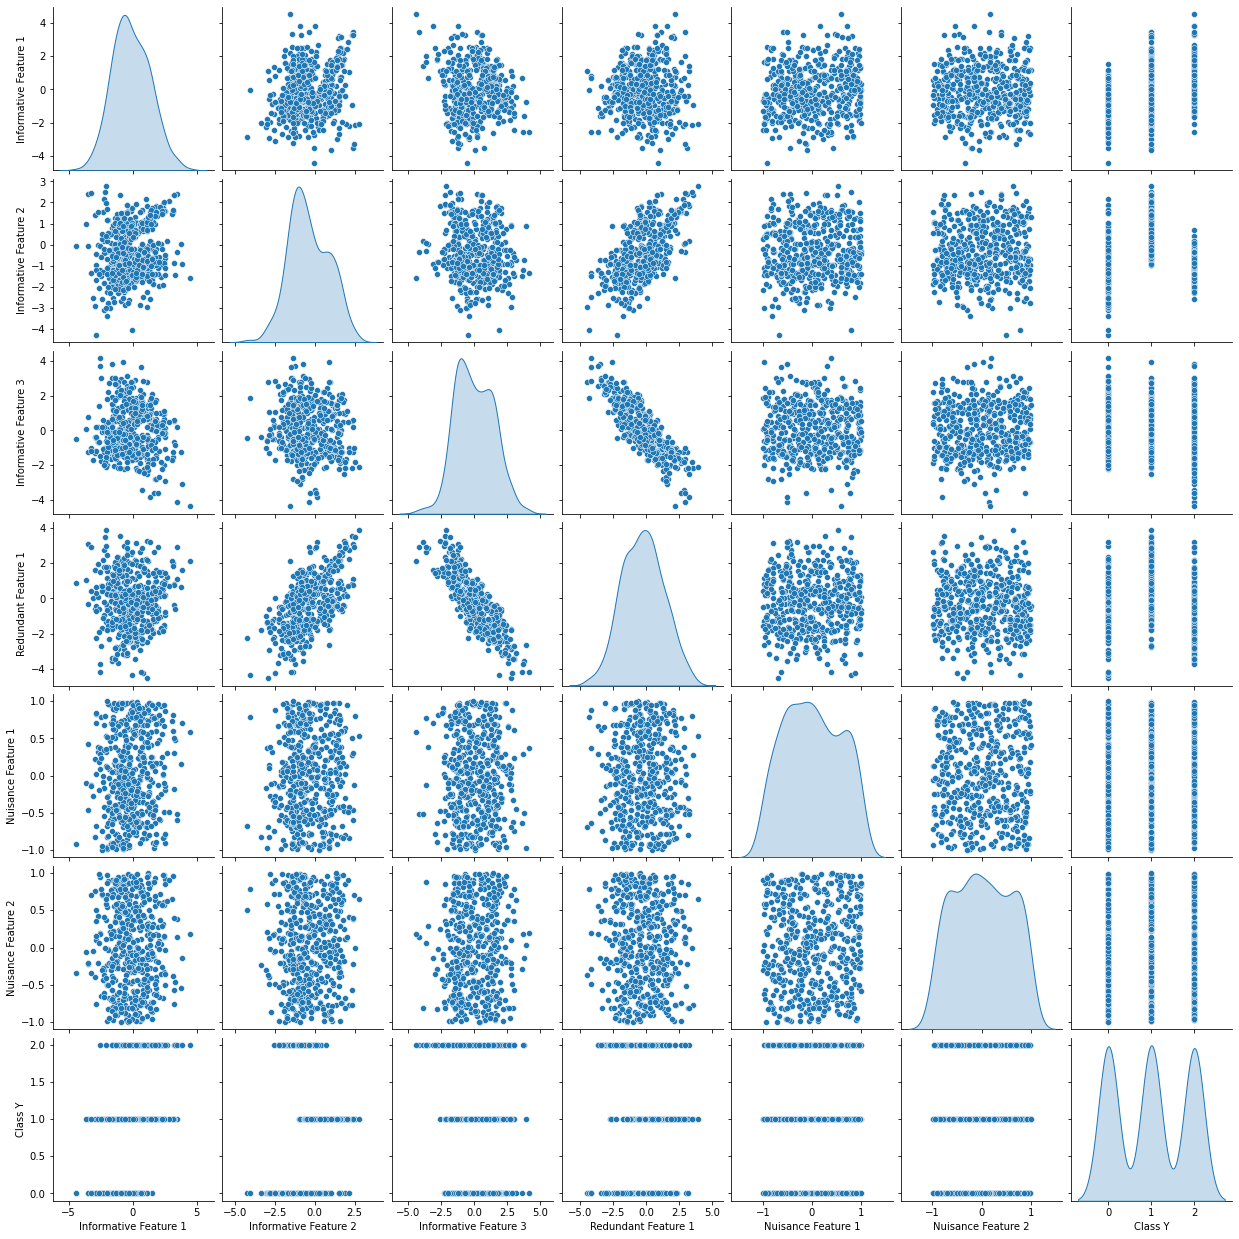

In [28]:
graph = sns.pairplot(classification_set, diag_kind="kde", kind="scatter")
plt.show()

In [29]:
#testing make_regression
X_reg, y_reg = make_regression(n_samples= 500, n_features= 4, n_informative=3, shuffle=False)

In [30]:
# Task: use prev X, X_NF + linear combination (with noise to generate y for regression)
regression_set = pd.concat([X, X_NF], axis=1)
coefs = np.random.rand(6)
print(f"coefs: {coefs}")
regression_set["Y"] = np.dot(regression_set, coefs) + np.random.normal(loc=0, scale=1, size=500)
regression_set.head()

coefs: [0.95658627 0.22512477 0.43068664 0.9079565  0.55876283 0.43731046]


,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Nuisance Feature 1,Nuisance Feature 2,Y
0,-0.368107,-1.311228,-0.465412,-0.462678,0.797412,-0.679362,-2.438441
1,0.179862,0.959893,-1.636397,2.024879,-0.775982,0.363486,0.198087
2,-1.439011,-0.104655,-2.053467,1.824960,0.166329,0.224459,-0.056066
3,-0.665474,1.499333,-2.222333,2.982010,0.018303,-0.510626,2.774364
4,-1.569689,-1.078996,-1.474242,0.681326,-0.947707,-0.567546,-3.020207


In [31]:
regression_set.describe()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Nuisance Feature 1,Nuisance Feature 2,Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.107477,-0.381357,0.026631,-0.271882,0.007113,0.018228,-0.435730
std,1.465684,1.256380,1.444672,1.573659,0.569514,0.574272,2.138800
min,-4.407847,-4.275253,-4.375365,-4.509913,-0.999502,-0.993197,-6.392359
25%,-1.162086,-1.310527,-1.108575,-1.450513,-0.466116,-0.467221,-1.987478
50%,-0.246354,-0.551160,-0.104372,-0.312550,-0.018182,0.000476,-0.451498
75%,0.911171,0.598777,1.129237,0.827191,0.504623,0.511315,1.049509
max,4.507611,2.773185,4.170502,3.892897,0.997740,0.996958,5.102954


In [32]:
regression_set.corr()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Nuisance Feature 1,Nuisance Feature 2,Y
Informative Feature 1,1.000000,0.160926,-0.047077,0.024026,0.125142,0.004675,0.681844
Informative Feature 2,0.160926,1.000000,-0.130070,0.631277,0.064964,0.026091,0.605416
Informative Feature 3,-0.047077,-0.130070,1.000000,-0.844766,-0.002904,0.065875,-0.275608
Redundant Feature 1,0.024026,0.631277,-0.844766,1.000000,0.025165,-0.037500,0.476687
Nuisance Feature 1,0.125142,0.064964,-0.002904,0.025165,1.000000,-0.017828,0.270341
Nuisance Feature 2,0.004675,0.026091,0.065875,-0.037500,-0.017828,1.000000,0.137405
Y,0.681844,0.605416,-0.275608,0.476687,0.270341,0.137405,1.000000


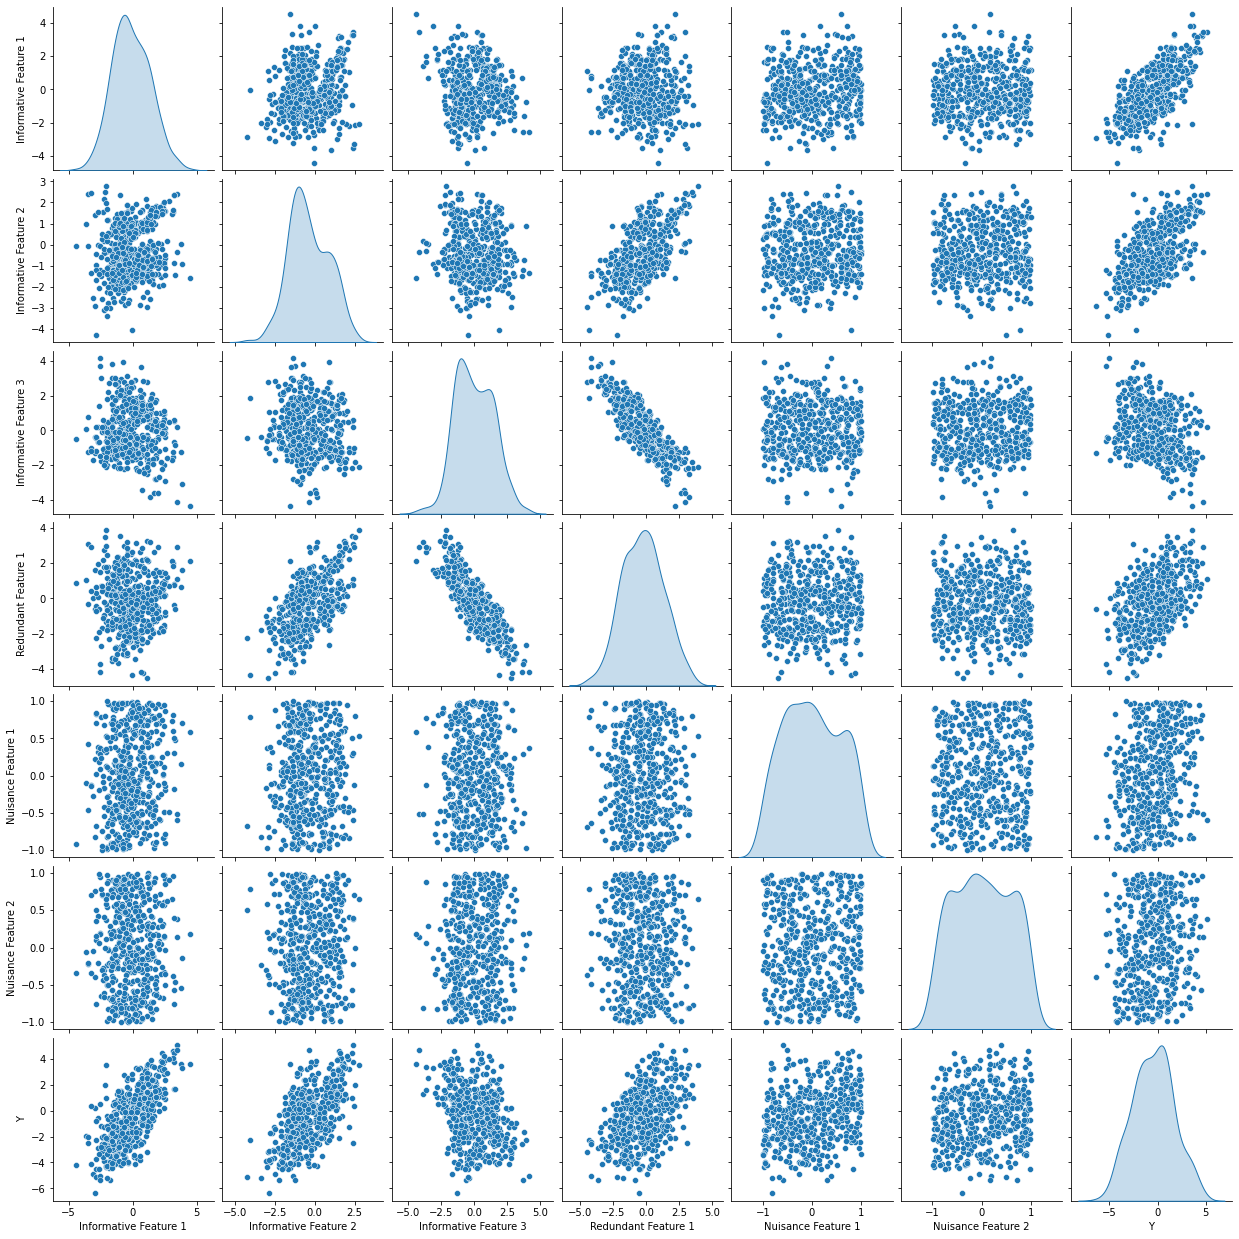

In [33]:
graph = sns.pairplot(regression_set, diag_kind="kde", kind="scatter")
plt.show()

In [34]:
#export to csv for consistency
classification_set.to_csv("./classification_set.csv")
regression_set.to_csv("./regression_set.csv")